# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [7]:
# Libraries
import os
import ta
import fnmatch
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

u:\Lektionen\GitHub_Repositories\data_ingestion\05_Yahoo_Finance_WebAPI


## Get data
List of stock market symbols: https://finance.yahoo.com/lookup

In [ ]:
# Retrieve the Microsoft stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

data = yf.download('MSFT', start = "2022-01-01", end = today, progress=False)
data.tail()

Today is: 2025-08-25



1 Failed download:
['MSFT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


## Calculate techniqual indicators

In [3]:
# Function to compute Bollinger Bands 
def BBANDS(data, n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for Google using the 50-day Moving average
BBANDS = BBANDS(data, 50)
BBANDS

,Open,High,Low,Close,Adj Close,Volume,MiddleBand,UpperBand,LowerBand
Date,,,,,,,,,


## Plot data and techniqual indicators

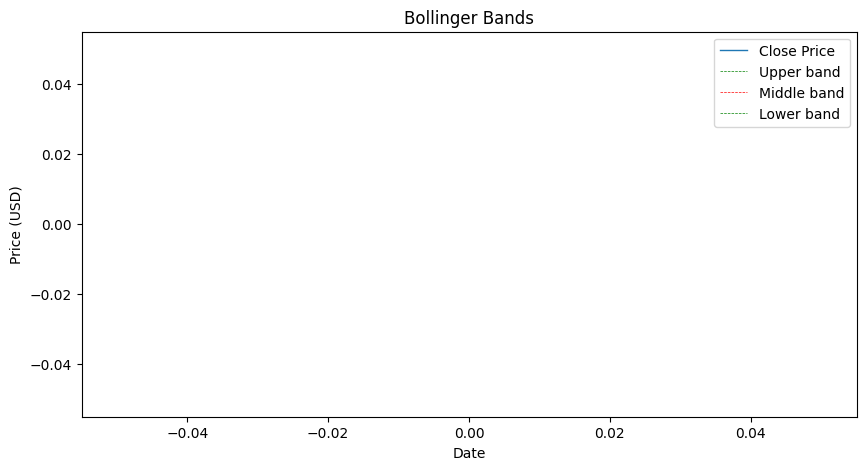

In [4]:
# Create the plot
plt.figure(figsize=(10, 5))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(BBANDS.Close, lw=1.0, label='Close Price')
plt.plot(data['UpperBand'], 'g--', lw=0.5, label='Upper band')
plt.plot(data['MiddleBand'], 'r--', lw=0.5, label='Middle band')
plt.plot(data['LowerBand'], 'g--', lw=0.5, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2025-08-25 15:32:52
Python Version: 3.11.9
-----------------------------------
